## Tumor Detection and type identification
### Shivam Amrutkar

--->  <a href='https://linkedin.com/in/shivamamrutkar'>   LinkedIn</a>
<br>--->  <a href='https://github.com/yesshivam007'>  Github</a>
<br> ---> <a href='https://github.com/yesshivam007/tumor_identification'>**Github link for project**</a> 

<hr>

### Importing required modules

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Declaring Constants

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 512
CHANNELS = 3
EPOCHS = 20

### Loading datasets

#### Training

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2870 files belonging to 4 classes.


#### Testing

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Testing",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 394 files belonging to 4 classes.


### Class names

In [ ]:
class_names = train_ds.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

### Shape of image

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 512, 512, 3)
[2 3 0 1 3 1 0 3 1 1 0 3 3 1 3 1]


### Images with labels [Reference]

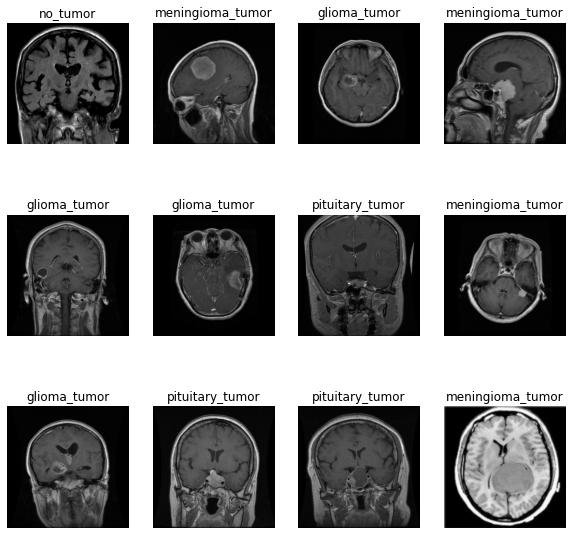

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Extra layers

#### Resize & Rescale layers

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

#### Rotation & Orientation layers

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

### Layers

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

### Summary of model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 512, 512, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 510, 510, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 255, 255, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 126, 126, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (16, 124, 124, 64)       

### Compilation of model

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### Running epochs

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
180/180 [==============================] - 32s 150ms/step - loss: 1.0664 - accuracy: 0.5279
Epoch 2/20
180/180 [==============================] - 26s 146ms/step - loss: 0.6280 - accuracy: 0.7369
Epoch 3/20
180/180 [==============================] - 26s 144ms/step - loss: 0.4163 - accuracy: 0.8272
Epoch 4/20
180/180 [==============================] - 27s 146ms/step - loss: 0.3101 - accuracy: 0.8812
Epoch 5/20
180/180 [==============================] - 26s 145ms/step - loss: 0.2440 - accuracy: 0.9098
Epoch 6/20
180/180 [==============================] - 26s 143ms/step - loss: 0.1835 - accuracy: 0.9279
Epoch 7/20
180/180 [==============================] - 27s 146ms/step - loss: 0.1506 - accuracy: 0.9449
Epoch 8/20
180/180 [==============================] - 26s 144ms/step - loss: 0.1037 - accuracy: 0.9645
Epoch 9/20
180/180 [==============================] - 26s 143ms/step - loss: 0.1158 - accuracy: 0.9575
Epoch 10/20
180/180 [==============================] - 26s 144ms/step - l

### Checking scores

In [ ]:
scores = model.evaluate(test_ds)

25/25 [==============================] - 3s 94ms/step - loss: 6.0241 - accuracy: 0.7437


### Visualising the scores

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
acc = history.history['accuracy']

loss = history.history['loss']

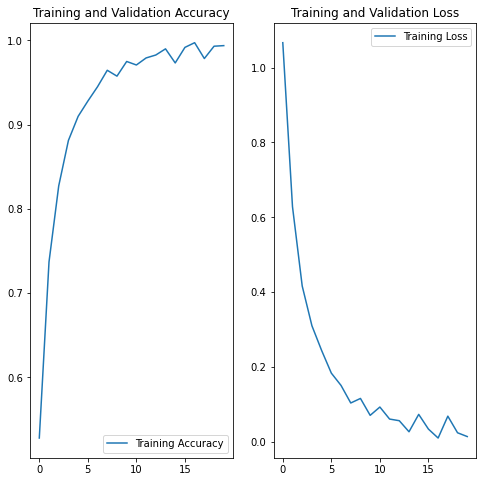

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing the model 

first image to predict
actual label: no_tumor
predicted label: no_tumor


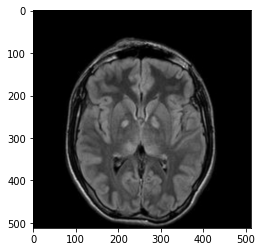

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Testing on test dataset

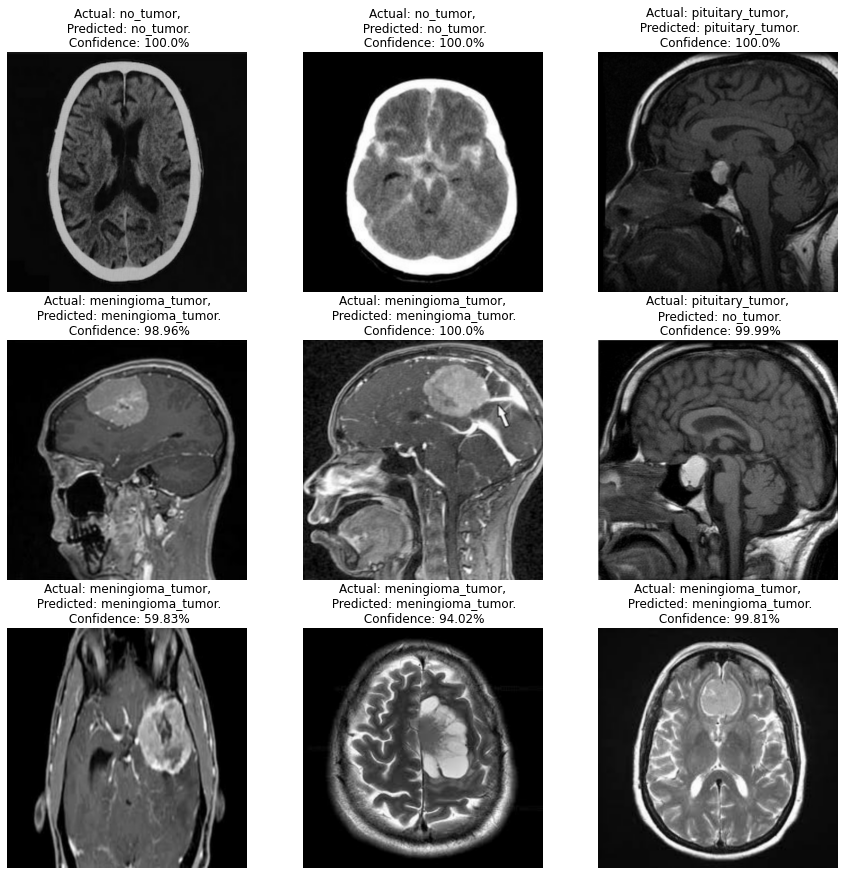

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(50):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### Saving the model

In [ ]:
model.save("drive/MyDrive/1")

INFO:tensorflow:Assets written to: drive/MyDrive/1/assets


INFO:tensorflow:Assets written to: drive/MyDrive/1/assets


In [ ]:
model.save("content/1")

INFO:tensorflow:Assets written to: content/1/assets


INFO:tensorflow:Assets written to: content/1/assets


<hr>

<div class="alert alert-block alert-warning">
<b>Notes:</b> <br>
    <ul>
        <li>Reference for this project was taken from <a href='https://youtube.com/playlist?list=PLeo1K3hjS3ut49PskOfLnE6WUoOp_2lsD'>this playlist</a> and <a href='https://github.com/codebasics/potato-disease-classification'>this github repo</a></li>
        <li>I used this <a href='https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri'>Dataset</a></li>
    </ul>
</div>